<a href="https://colab.research.google.com/github/ddlxdd/Computational-Content-Analysis-PsychForum/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

flag_df = pd.read_csv('/content/sentiment_flag_roBERTa_24_2_16.csv')

In [ ]:
data_for_pca = flag_df[['Negative', 'Neutral', 'Positive']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_pca)

In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


data_for_pca = flag_df[['Negative', 'Neutral', 'Positive']]

# Impute NaN values with the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(data_for_pca)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(imputed_data)

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

# Check the explained variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

pca_df.to_csv('pca_sentiment_scores.csv', index=False)

[5.39953683e-01 4.60046317e-01 3.62624271e-15]


In [ ]:
import numpy as np

loadings = pca.components_
print("PCA Loadings:\n", loadings)

PCA Loadings:
 [[ 0.6432163  -0.75071682  0.15065539]
 [-0.48885122 -0.25119545  0.83541926]
 [ 0.58931934  0.61100335  0.52856184]]


In [ ]:
flag_df[['PCA1', 'PCA2', 'PCA3']] = pca_df[['PCA1', 'PCA2', 'PCA3']]

In [ ]:
flag_df.head()

,subid,session,trial,Taysha,Laura,Samantha,Samantha tie breaking notes,"Retriving movie memory? (1 = cake, 2 = north, 3 = pie, 4 = cross, 5 = unknown)",Notes,Xiaochen (transcription differences),...,Sentiment(roBERTa),Sentiment probability(roBERTa),Unnamed: 16,Negative,Neutral,Positive,Unnamed: 20,PCA1,PCA2,PCA3
0,1,1,1,I was thinking about baking a pie…[inaudible],I was thinking about baking a pie…[inaudible],NaN,NaN,NaN,NaN,[],...,neutral,0.621768,NaN,0.011975,0.881989,0.106036,-0.167942,-1.309330,-0.032955,7.904297e-08
1,1,1,2,[inaudible],I was thinking about...[inaudible],NaN,NaN,NaN,NaN,['[inaudible]/i was thinking about...[inaudibl...,...,neutral,0.675962,NaN,0.041050,0.923291,0.035659,-0.563324,-1.403775,-0.401182,2.092944e-07
2,1,1,3,I’m thinking about this amazing cherry pie... ...,I was thinking about this amazing cherry pie t...,I was thinking about this amazing cherry pie t...,neither,NaN,NaN,"[""i'm/i was"", 'pie.. [inaudible maybe “making....",...,positive,0.615510,NaN,0.003280,0.034335,0.962386,-0.719895,1.775250,4.098603,6.501085e-08
3,1,1,4,"Family...[inaudible, sounded like they maybe s...","I was thinking about my family, specifically.....","I was thinking about my family, specifically.....",matched both - still couldn't understand last ...,NaN,NaN,['family...[inaudible sounded like they maybe ...,...,neutral,0.704368,NaN,0.069364,0.877701,0.052935,NaN,-1.181770,-0.346646,-1.044608e-07
4,1,1,5,I'm thinking about...Curtis...next week...[ina...,I was thinking about my boyfriend Curtis who i...,I was thinking about my boyfriend Curtis who i...,Laura,NaN,NaN,"[""i'm/i was"", 'about...curtis...next week...[i...",...,neutral,0.542363,NaN,0.013964,0.770773,0.215263,NaN,-0.898517,0.490889,-1.190411e-07


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


loadings = pca.components_

# Create a DataFrame with the loadings and the sentiment categories as row labels
loadings_df = pd.DataFrame(loadings.T, columns=['PCA1', 'PCA2', 'PCA3'], index=['Negative', 'Neutral', 'Positive'])


print("PCA Loadings:")
print(loadings_df)


PCA Loadings:
              PCA1      PCA2      PCA3
Negative  0.643216 -0.488851  0.589319
Neutral  -0.750717 -0.251195  0.611003
Positive  0.150655  0.835419  0.528562


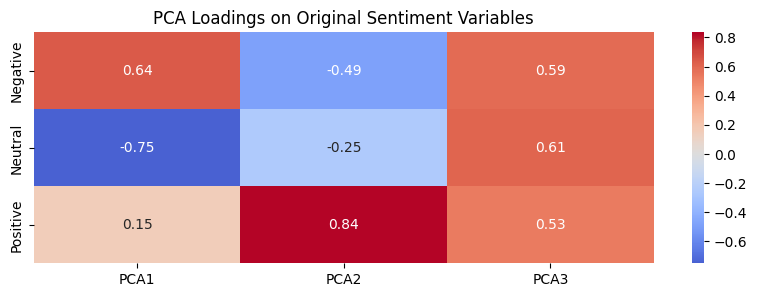

In [ ]:
plt.figure(figsize=(10, 3))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings on Original Sentiment Variables')
plt.show()

<ipython-input-10-4ef19188d9d4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_pca_scores = flag_df.groupby('Sentiment(roBERTa)').mean()[['PCA1', 'PCA2', 'PCA3']]


                        PCA1      PCA2          PCA3
Sentiment(roBERTa)                                  
negative            1.517707 -0.857102  6.831801e-09
neutral            -0.620257 -0.070439 -3.443814e-09
positive            0.992129  2.750452  6.570407e-10


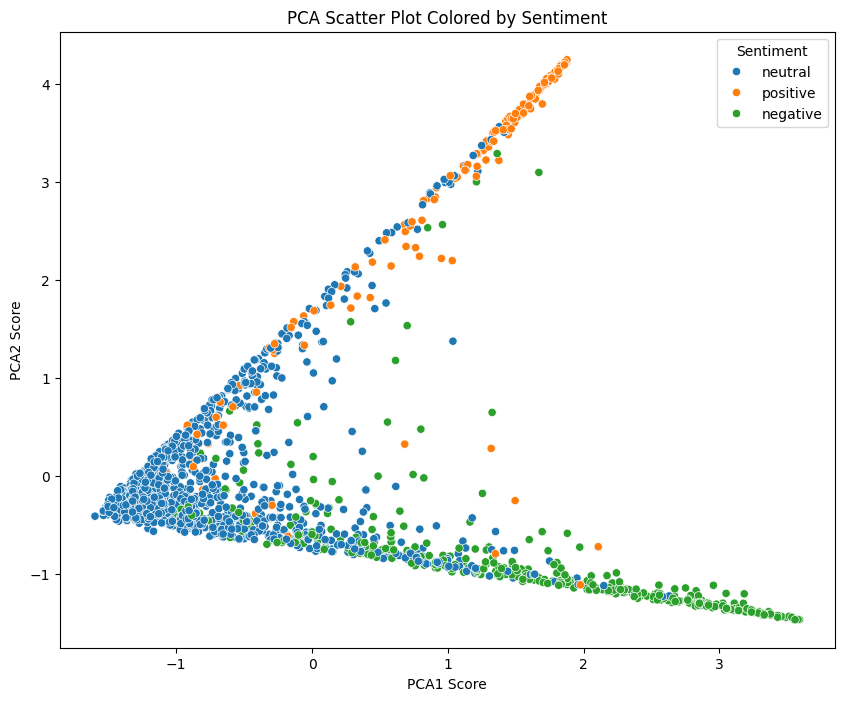

In [ ]:
# Calculate the mean PCA score for each sentiment category
mean_pca_scores = flag_df.groupby('Sentiment(roBERTa)').mean()[['PCA1', 'PCA2', 'PCA3']]
print(mean_pca_scores)

# Plot a scatter plot of PCA1 vs PCA2 colored by the 'Sentiment(roBERTa)'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=flag_df, x='PCA1', y='PCA2', hue='Sentiment(roBERTa)')
plt.title('PCA Scatter Plot Colored by Sentiment')
plt.xlabel('PCA1 Score')
plt.ylabel('PCA2 Score')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
# Plot scaled features
xdata = pca_result[:,0]
ydata = pca_result[:,1]
zdata = pca_result[:,2]

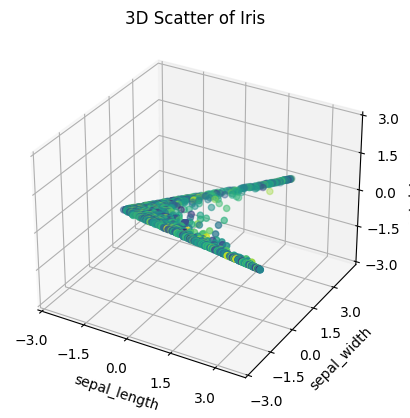

In [ ]:
# Plot 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='viridis')

# Plot title of graph
plt.title(f'3D Scatter of Iris')

# Plot x, y, z even ticks
ticks = np.linspace(-3, 3, num=5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_zticks(ticks)

# Plot x, y, z labels
ax.set_xlabel('sepal_length', rotation=150)
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length', rotation=60)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

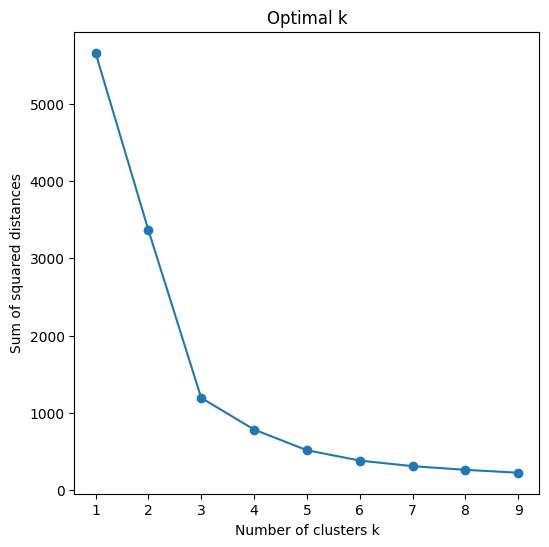

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Choose k, using the Elbow method
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(pca_df[['PCA1', 'PCA2', 'PCA3']])
    sse.append(km.inertia_)


plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


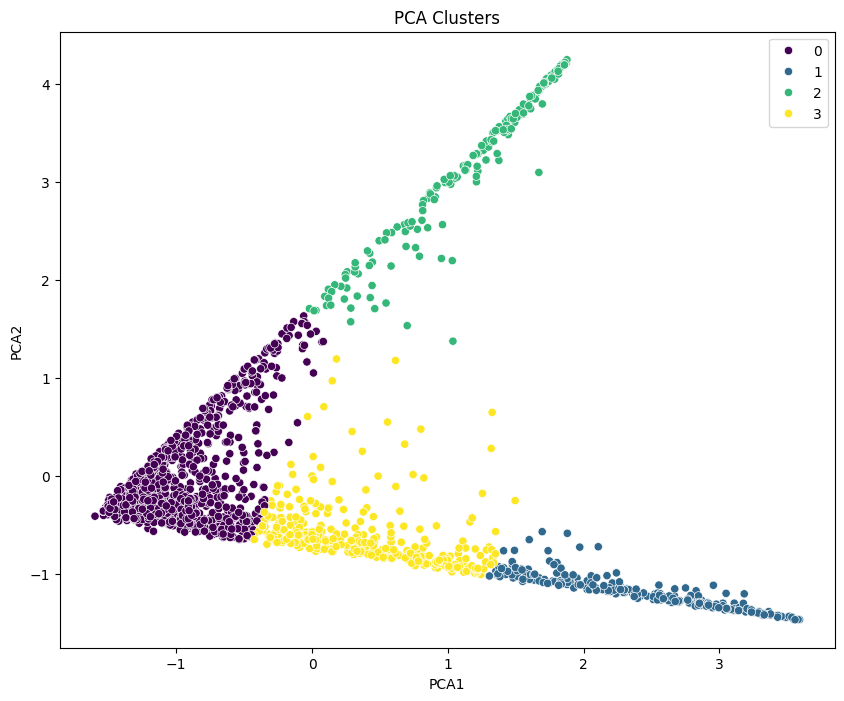

In [ ]:
kmeans = KMeans(n_clusters=4)
cluster_labels = kmeans.fit_predict(pca_df[['PCA1', 'PCA2', 'PCA3']])


pca_df['Cluster'] = cluster_labels
flag_df['Cluster'] = cluster_labels


plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [ ]:
flag_df.to_csv('clustered_df.csv', index=False)

In [2]:
import pandas as pd
flag_df = pd.read_csv('clustered_df.csv')

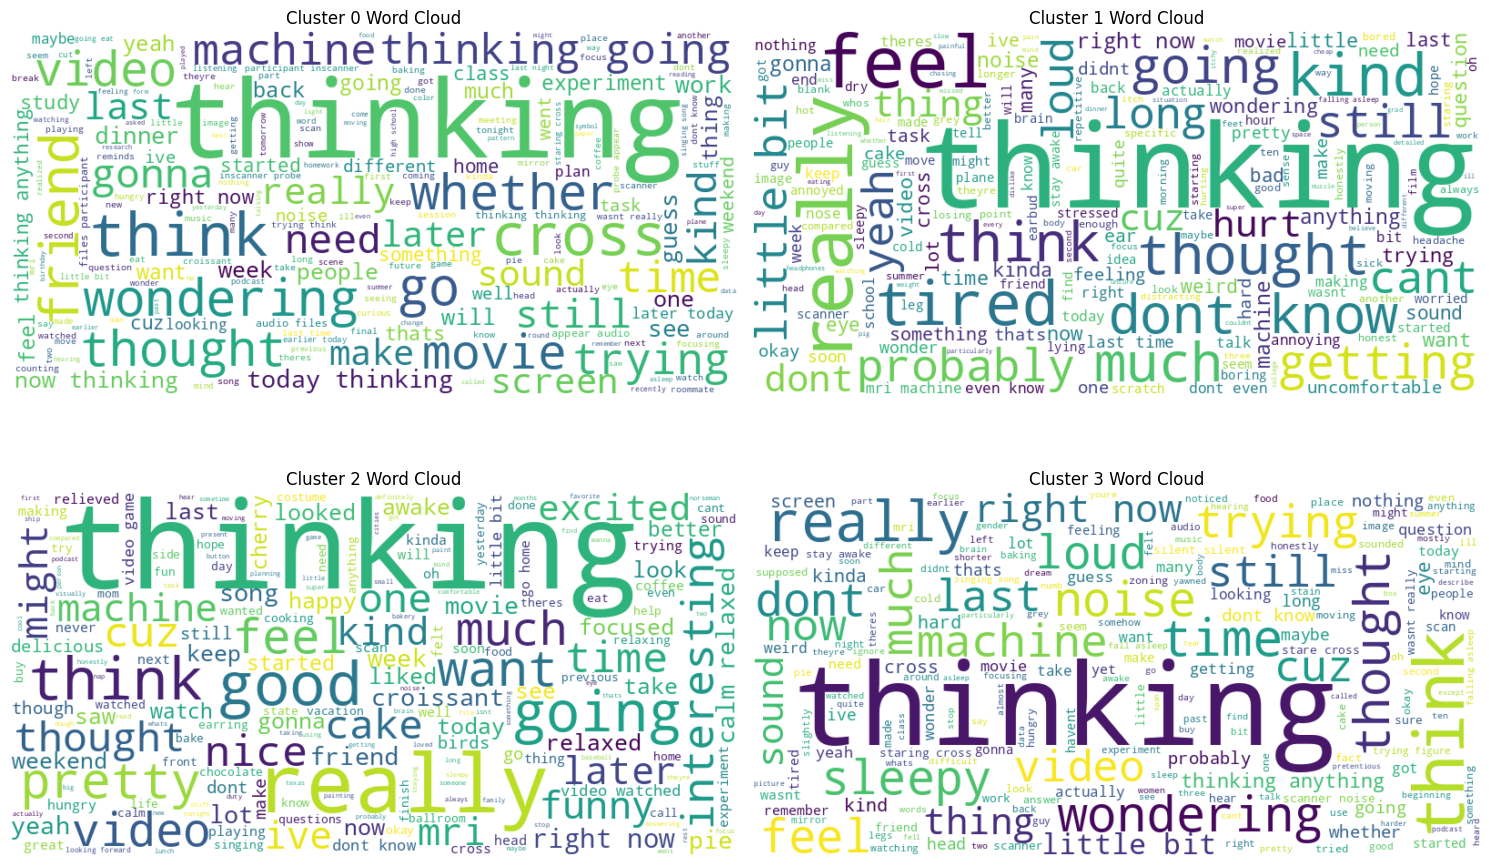

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
import re
from wordcloud import STOPWORDS

# Filter the data to include only the 'Laura' and 'Cluster' columns
laura_cluster_data = flag_df[['Laura', 'Cluster']].dropna()

# Define additional stop words
additional_stop_words = {'um', 'uh', 'inaudible', 'unavailable', 'im', 'Im'}

# Combine default STOPWORDS with additional_stop_words
combined_stopwords = STOPWORDS.union(additional_stop_words)

# Function to preprocess the text
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    text = " ".join([word for word in text.split() if word not in combined_stopwords])
    return text

# Preprocess the texts
laura_cluster_data['Cleaned_Laura'] = laura_cluster_data['Laura'].apply(preprocess_text)

# Group the cleaned transcriptions by cluster
clustered_texts_cleaned = laura_cluster_data.groupby('Cluster')['Cleaned_Laura'].apply(lambda texts: ' '.join(texts))

# Generate word clouds for each cluster after preprocessing
wordclouds_cleaned = {}
for cluster, texts in clustered_texts_cleaned.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=combined_stopwords).generate(texts)
    wordclouds_cleaned[cluster] = wordcloud

# Plot the word clouds in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (cluster, wordcloud) in enumerate(wordclouds_cleaned.items()):
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Cluster {cluster} Word Cloud')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
mean_values = flag_df.groupby('Cluster')[['Negative', 'Neutral', 'Positive']].mean()
print(mean_values)

cluster_sizes = flag_df['Cluster'].value_counts()
print(cluster_sizes)

         Negative   Neutral  Positive
Cluster                              
0        0.066009  0.818843  0.115148
1        0.730565  0.250085  0.019349
2        0.019163  0.212684  0.768153
3        0.338510  0.591005  0.070484
0    994
3    465
1    253
2    176
Name: Cluster, dtype: int64


In [ ]:

cluster_0_df = flag_df[flag_df['Cluster'] == 0]

cluster_1_df = flag_df[flag_df['Cluster'] == 1]

cluster_2_df = flag_df[flag_df['Cluster'] == 2]

cluster_3_df = flag_df[flag_df['Cluster'] == 3]

In [ ]:
detailed_cluster_0_df = cluster_0_df[['Laura', 'Negative', 'Neutral', 'Positive', 'Cluster']]
detailed_cluster_0_df.to_csv('detailed_cluster_0_analysis.csv', index=False)

In [ ]:
detailed_cluster_1_df = cluster_1_df[['Laura', 'Negative', 'Neutral', 'Positive', 'Cluster']]
detailed_cluster_1_df.to_csv('detailed_cluster_1_analysis.csv', index=False)

In [ ]:
detailed_cluster_2_df = cluster_2_df[['Laura', 'Negative', 'Neutral', 'Positive', 'Cluster']]
detailed_cluster_2_df.to_csv('detailed_cluster_2_analysis.csv', index=False)

In [ ]:
detailed_cluster_3_df = cluster_3_df[['Laura', 'Negative', 'Neutral', 'Positive', 'Cluster']]
detailed_cluster_3_df.to_csv('detailed_cluster_3_analysis.csv', index=False)

In [ ]:
!pip install -U bertopic
!pip install -U safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 27.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 16.6 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.3 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039284 sha256=c5adb36213499447bcd3b236a33a0dce68924b61ef393574d4a37f34d226bcee
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [ ]:
from bertopic import BERTopic

# Load the pre-trained model from Hugging Face
topic_model = BERTopic.load("MaartenGr/BERTopic_Wikipedia")

topics.json:   0%|          | 0.00/10.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

topic_embeddings.safetensors:   0%|          | 0.00/3.65M [00:00<?, ?B/s]

ctfidf_config.json:   0%|          | 0.00/4.66M [00:00<?, ?B/s]

ctfidf.safetensors:   0%|          | 0.00/46.4M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

new_df = flag_df.copy()

# Prepare embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Initialize BERTopic model
topic_model = BERTopic(embedding_model=embedding_model, verbose=True)

In [ ]:
new_df.head()

,subid,session,trial,Taysha,Laura,Samantha,Samantha tie breaking notes,"Retriving movie memory? (1 = cake, 2 = north, 3 = pie, 4 = cross, 5 = unknown)",Notes,Xiaochen (transcription differences),...,Sentiment probability(roBERTa),Unnamed: 16,Negative,Neutral,Positive,Unnamed: 20,PCA1,PCA2,PCA3,Cluster
0,1,1,1,I was thinking about baking a pie…[inaudible],I was thinking about baking a pie…[inaudible],NaN,NaN,NaN,NaN,[],...,0.621768,NaN,0.011975,0.881989,0.106036,-0.167942,-1.309330,-0.032955,7.904297e-08,0
1,1,1,2,[inaudible],I was thinking about...[inaudible],NaN,NaN,NaN,NaN,['[inaudible]/i was thinking about...[inaudibl...,...,0.675962,NaN,0.041050,0.923291,0.035659,-0.563324,-1.403775,-0.401182,2.092944e-07,0
2,1,1,3,I’m thinking about this amazing cherry pie... ...,I was thinking about this amazing cherry pie t...,I was thinking about this amazing cherry pie t...,neither,NaN,NaN,"[""i'm/i was"", 'pie.. [inaudible maybe “making....",...,0.615510,NaN,0.003280,0.034335,0.962386,-0.719895,1.775250,4.098603,6.501085e-08,2
3,1,1,4,"Family...[inaudible, sounded like they maybe s...","I was thinking about my family, specifically.....","I was thinking about my family, specifically.....",matched both - still couldn't understand last ...,NaN,NaN,['family...[inaudible sounded like they maybe ...,...,0.704368,NaN,0.069364,0.877701,0.052935,NaN,-1.181770,-0.346646,-1.044608e-07,0
4,1,1,5,I'm thinking about...Curtis...next week...[ina...,I was thinking about my boyfriend Curtis who i...,I was thinking about my boyfriend Curtis who i...,Laura,NaN,NaN,"[""i'm/i was"", 'about...curtis...next week...[i...",...,0.542363,NaN,0.013964,0.770773,0.215263,NaN,-0.898517,0.490889,-1.190411e-07,0


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import re

def preprocess_documents(docs):
    # Define a regular expression pattern to handle different cases
    simple_patterns = r'\[inaudible\]|\[silent\]|\[unavailable\]'
    complex_pattern = r'\[inaudible[^]]*\]'
    combined_pattern = f'{simple_patterns}|{complex_pattern}'

    # Initialize a counter for excluded sentences
    excluded_sentence_count = 0

    # Apply the combined pattern to remove undesired phrases and words
    processed_docs = []
    for doc in docs:
        # Count how many times the pattern appears in the document
        excluded_count = len(re.findall(combined_pattern, doc))
        excluded_sentence_count += excluded_count
        processed_doc = re.sub(combined_pattern, '', doc)
        processed_docs.append(processed_doc)

    print(f"Total sentences excluded due to pattern issues: {excluded_sentence_count}")
    return processed_docs, excluded_sentence_count

# Assume new_df['Laura'] is defined elsewhere
docs = new_df['Laura'].fillna('').astype(str).tolist()

# Preprocess documents to remove patterns and get the count of excluded sentences
processed_docs, excluded_sentence_count = preprocess_documents(docs)

# Further steps remain the same...
# Prepare embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for your processed documents
embeddings = embedding_model.encode(processed_docs, show_progress_bar=True)

# Prepare for topic modeling with BERTopic
custom_stop_words = ['uh', 'um', 'like', 'just', 'really', 'inaudible']
default_stop_words = CountVectorizer(stop_words='english').get_stop_words()
extended_stop_words = default_stop_words.union(set(custom_stop_words))
extended_stop_words_list = list(extended_stop_words)
vectorizer_model = CountVectorizer(stop_words=extended_stop_words_list)

# Initialize and fit BERTopic
topic_model = BERTopic(embedding_model=embedding_model, vectorizer_model=vectorizer_model, verbose=True)
topic_model = topic_model.fit(processed_docs, embeddings=embeddings)

# Output the count of excluded sentences
print(f"Total sentences excluded due to pattern issues: {excluded_sentence_count}")

Total sentences excluded due to pattern issues: 392


Batches:   0%|          | 0/59 [00:00<?, ?it/s]

2024-02-23 20:41:11,916 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:41:29,871 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:41:29,874 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:41:29,942 - BERTopic - Cluster - Completed ✓
2024-02-23 20:41:29,951 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:41:30,062 - BERTopic - Representation - Completed ✓


Total sentences excluded due to pattern issues: 392


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import re

def preprocess_documents(docs):
    # Define a regular expression pattern to handle different cases
    simple_patterns = r'\[inaudible\]|\[silent\]|\[unavailable\]'
    complex_pattern = r'\[inaudible[^]]*\]'
    combined_pattern = f'{simple_patterns}|{complex_pattern}'

    # Apply the combined pattern to remove undesired phrases and words
    processed_docs = [re.sub(combined_pattern, '', doc) for doc in docs]
    return processed_docs

# Prepare your documents
docs = new_df['Laura'].fillna('').astype(str).tolist()

# Preprocess documents to remove '[inaudible]'
processed_docs = preprocess_documents(docs)

# Prepare embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for your processed documents
embeddings = embedding_model.encode(processed_docs, show_progress_bar=True)

custom_stop_words = ['uh', 'um', 'like', 'just', 'really', 'inaudible']

default_stop_words = CountVectorizer(stop_words='english').get_stop_words()
extended_stop_words = default_stop_words.union(set(custom_stop_words))

# Convert the extended stop words set to a list
extended_stop_words_list = list(extended_stop_words)

# Initialize CountVectorizer with the extended stop words list
vectorizer_model = CountVectorizer(stop_words=extended_stop_words_list)

# Fit BERTopic with default UMAP and HDBSCAN settings and CountVectorizer
topic_model = BERTopic(embedding_model=embedding_model, vectorizer_model=vectorizer_model, verbose=True)
topic_model = topic_model.fit(processed_docs, embeddings=embeddings)

Batches:   0%|          | 0/59 [00:00<?, ?it/s]

2024-02-23 20:41:55,119 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:42:05,194 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:42:05,197 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:42:05,264 - BERTopic - Cluster - Completed ✓
2024-02-23 20:42:05,271 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:42:05,374 - BERTopic - Representation - Completed ✓


In [ ]:
def apply_bertopic_to_cluster(texts):
    if texts:
        # Create embeddings for the texts
        embeddings = embedding_model.encode(texts, show_progress_bar=True)

        # Fit the BERTopic model to these embeddings
        topics, _ = topic_model.fit_transform(texts, embeddings=embeddings)
        return topic_model.get_topic_info()
    else:
        return None

In [ ]:
for cluster_label in sorted(new_df['Cluster'].unique()):
    print(f"Topics for Cluster {cluster_label}")
    texts = new_df[new_df['Cluster'] == cluster_label]['Laura'].tolist()

    # Ensure that texts are strings and not empty
    texts = [str(text) for text in texts if isinstance(text, str) and text.strip()]

    cluster_topics = apply_bertopic_to_cluster(texts)
    if cluster_topics is not None:
        print(cluster_topics)
    else:
        print(f"No data to process in Cluster {cluster_label}")

Topics for Cluster 0


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

2024-02-23 20:42:18,786 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:42:23,501 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:42:23,502 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:42:23,545 - BERTopic - Cluster - Completed ✓
2024-02-23 20:42:23,551 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:42:23,603 - BERTopic - Representation - Completed ✓


    Topic  Count                              Name  \
0      -1     30   -1_video_podcast_head_waterfall   
1       0    512      0_thinking_going_today_later   
2       1    109   1_thinking_maybe_sounded_person   
3       2     68       2_cross_think_image_staring   
4       3     54           3_pie_cake_baking_video   
5       4     46             4_movie_man_movies_tv   
6       5     40        5_sound_machine_noise_hear   
7       6     39       6_screen_mirror_looking_eye   
8       7     37           7_song_singing_head_new   
9       8     28          8_mri_scan_scanner_scans   
10      9     17  9_appear_probe_participant_files   
11     10     11           10_cut_finger_stay_went   

                                       Representation  \
0   [video, podcast, head, waterfall, water, tryin...   
1   [thinking, going, today, later, need, friend, ...   
2   [thinking, maybe, sounded, person, having, try...   
3   [cross, think, image, staring, focus, people, ...   
4   [pie, ca

Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2024-02-23 20:42:28,002 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:42:31,808 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:42:31,809 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:42:31,826 - BERTopic - Cluster - Completed ✓
2024-02-23 20:42:31,832 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:42:31,860 - BERTopic - Representation - Completed ✓


   Topic  Count                           Name  \
0     -1     94     -1_thinking_don_cross_know   
1      0     46    0_thinking_right_hurts_nose   
2      1     28    1_machine_loud_thinking_mri   
3      2     24          2_tired_awake_want_ve   
4      3     19   3_thoughts_don_feel_thinking   
5      4     19  4_thinking_finger_learned_way   
6      5     13        5_movie_plane_film_didn   
7      6     10  6_video_boring_podcast_merlin   

                                      Representation  \
0  [thinking, don, cross, know, going, questions,...   
1  [thinking, right, hurts, nose, ears, little, s...   
2  [machine, loud, thinking, mri, sounds, noises,...   
3  [tired, awake, want, ve, sleepy, stay, soon, r...   
4  [thoughts, don, feel, thinking, know, things, ...   
5  [thinking, finger, learned, way, feel, school,...   
6  [movie, plane, film, didn, watch, understand, ...   
7  [video, boring, podcast, merlin, annoying, won...   

                                 Representat

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2024-02-23 20:42:34,690 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:42:37,253 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:42:37,255 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:42:37,268 - BERTopic - Cluster - Completed ✓
2024-02-23 20:42:37,275 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:42:37,295 - BERTopic - Representation - Completed ✓


   Topic  Count                           Name  \
0     -1     35    -1_thinking_birds_lot_cross   
1      0     82  0_thinking_going_relaxed_calm   
2      1     26      1_video_cake_pie_thinking   
3      2     19        2_movie_don_cuz_playing   
4      3     14    3_mri_machine_thinking_scan   

                                      Representation  \
0  [thinking, birds, lot, cross, funny, singing, ...   
1  [thinking, going, relaxed, calm, think, focuse...   
2  [video, cake, pie, thinking, croissant, cherry...   
3  [movie, don, cuz, playing, watch, want, pretty...   
4  [mri, machine, thinking, scan, brain, feels, s...   

                                 Representative_Docs  
0  [Compared to the previous experiment, this cro...  
1  [I’m pretty relaxed today. I was thinking abou...  
2  [I’m thinking about the croissant-making video...  
3  [Thinking about this movie I saw, like, two ni...  
4  [I was thinking that the MRI machine is an exa...  
Topics for Cluster 3


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2024-02-23 20:42:43,747 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:42:47,484 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:42:47,485 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:42:47,509 - BERTopic - Cluster - Completed ✓
2024-02-23 20:42:47,516 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:42:47,541 - BERTopic - Representation - Completed ✓


   Topic  Count                        Name  \
0      0    328  0_thinking_think_don_cross   
1      1     70  1_silent_cats_game_talking   
2      2     47            2_unavailable___   
3      3     20            3_unavailable___   

                                      Representation  \
0  [thinking, think, don, cross, time, trying, li...   
1  [silent, cats, game, talking, scream, saying, ...   
2                    [unavailable, , , , , , , , , ]   
3                    [unavailable, , , , , , , , , ]   

                                 Representative_Docs  
0  [I think this time I was thinking about the fa...  
1                     [[silent], [silent], [silent]]  
2      [[unavailable], [unavailable], [unavailable]]  
3      [[unavailable], [unavailable], [unavailable]]  


In [ ]:
import pandas as pd

# Initialize an empty DataFrame to store the results
all_topics_df = pd.DataFrame()

# Iterate through each cluster and apply BERTopic
for cluster_label in sorted(new_df['Cluster'].unique()):
    print(f"Topics for Cluster {cluster_label}")
    texts = new_df[new_df['Cluster'] == cluster_label]['Laura'].tolist()

    # Ensure that texts are strings and not empty
    texts = [str(text) for text in texts if isinstance(text, str) and text.strip()]

    # Apply BERTopic to the cluster
    cluster_topics = apply_bertopic_to_cluster(texts)


    if cluster_topics is not None:
        cluster_topics['Cluster'] = cluster_label

        # Append to the main DataFrame
        all_topics_df = pd.concat([all_topics_df, cluster_topics], ignore_index=True)
    else:
        print(f"No data to process in Cluster {cluster_label}")


Topics for Cluster 0


Batches:   0%|          | 0/31 [00:00<?, ?it/s]

2024-02-23 20:43:00,822 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:43:05,834 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:43:05,838 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:43:05,892 - BERTopic - Cluster - Completed ✓
2024-02-23 20:43:05,899 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:43:06,003 - BERTopic - Representation - Completed ✓


Topics for Cluster 1


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2024-02-23 20:43:10,526 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:43:13,198 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:43:13,200 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:43:13,216 - BERTopic - Cluster - Completed ✓
2024-02-23 20:43:13,224 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:43:13,250 - BERTopic - Representation - Completed ✓


Topics for Cluster 2


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2024-02-23 20:43:16,070 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:43:20,207 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:43:20,209 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:43:20,232 - BERTopic - Cluster - Completed ✓
2024-02-23 20:43:20,241 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:43:20,275 - BERTopic - Representation - Completed ✓


Topics for Cluster 3


Batches:   0%|          | 0/15 [00:00<?, ?it/s]

2024-02-23 20:43:25,806 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 20:43:29,514 - BERTopic - Dimensionality - Completed ✓
2024-02-23 20:43:29,516 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 20:43:29,538 - BERTopic - Cluster - Completed ✓
2024-02-23 20:43:29,545 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 20:43:29,567 - BERTopic - Representation - Completed ✓


In [ ]:
all_topics_df.head()

,Topic,Count,Name,Representation,Representative_Docs,Cluster
0,-1,204,-1_thinking_doing_video_class,"[thinking, doing, video, class, going, researc...","[I was thinking about the rest of my day, my c...",0
1,0,108,0_thinking_maybe_sounded_person,"[thinking, maybe, sounded, person, having, wan...","[I’m thinking about this one...[inaudible], I ...",0
2,1,63,1_cross_image_think_staring,"[cross, image, think, staring, focus, symbol, ...","[I realized that the cross is a bit centered, ...",0
3,2,54,2_pie_cake_baking_video,"[pie, cake, baking, video, raspberry, make, cr...","[I was thinking back to the video of the cake,...",0
4,3,54,3_trying_sleepy_wasn_sleep,"[trying, sleepy, wasn, sleep, stay, awake, foc...","[Uh, I’m just focusing really hard on trying o...",0


In [ ]:
all_topics_df.to_csv('all_topics_df.csv')